# **Object Classification for Automated CCTV Using Deep Learning**

## **Problem Statement**

With the increasing need for intelligent surveillance, traditional CCTV systems fall short due to continuous recording and high memory usage. This project aims to build an AI-powered object classification model to automate CCTV recording. The system activates recording only when specific objects (e.g., humans, vehicles, animals) are detected in the camera's field of view, thus saving storage and improving monitoring efficiency.

## **Objectives**
* Build a deep learning model to classify objects relevant to CCTV footage.

* Use the Fashion-MNIST dataset for initial benchmarking.

* Transition to real-world-like CCTV data in YOLO format.

* Implement real-time webcam-based object detection.

* Save frames when specified classes are detected.

## **Tools and Frameworks**

* Python 3.10
* TensorFlow / Keras (for Fashion-MNIST benchmarking)
* PyTorch (YOLOv5 object detection)
* OpenCV (video/webcam handling)
* Jupyter Notebook

## **Phase 1: Baseline with Fashion-MNIST**

* Loaded and preprocessed the Fashion-MNIST dataset
* Built a CNN model using Keras
* Evaluated model performance (~91% accuracy)


In [2]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
#Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
#Define the class names for easy interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

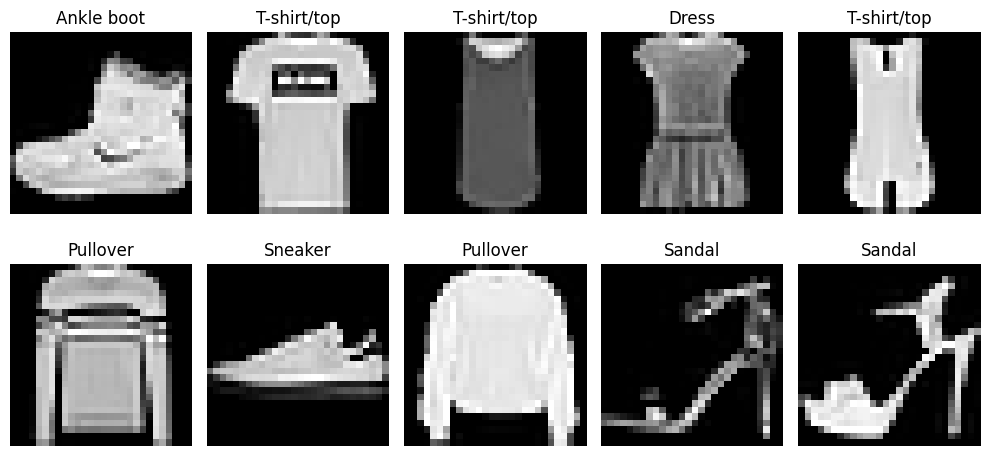

In [5]:
#Visualize some training images with class names
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Data Preprocessing**

In [6]:
#Normalize image pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
#Reshape data to add the channel dimension (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
#One-hot encode the labels for training
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


## **Building CNN Model**

In [10]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

In [11]:
#View model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Compile and Training Model**

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
#Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6860 - loss: 0.8733 - val_accuracy: 0.8535 - val_loss: 0.4066
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8405 - loss: 0.4449 - val_accuracy: 0.8706 - val_loss: 0.3523
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8664 - loss: 0.3755 - val_accuracy: 0.8855 - val_loss: 0.3100
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8812 - loss: 0.3340 - val_accuracy: 0.8914 - val_loss: 0.2971
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8881 - loss: 0.3080 - val_accuracy: 0.8967 - val_loss: 0.2782
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8963 - loss: 0.2907 - val_accuracy: 0.9029 - val_loss: 0.2682
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8976 - loss: 0.2746 - val_accuracy: 0.9051 - val_loss: 0.2600
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9048 - loss: 0.2580 - val_accuracy: 

## **Visualize Training History**

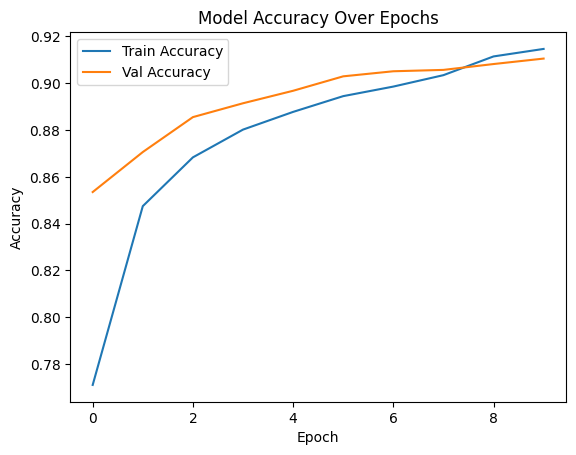

In [14]:
#Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


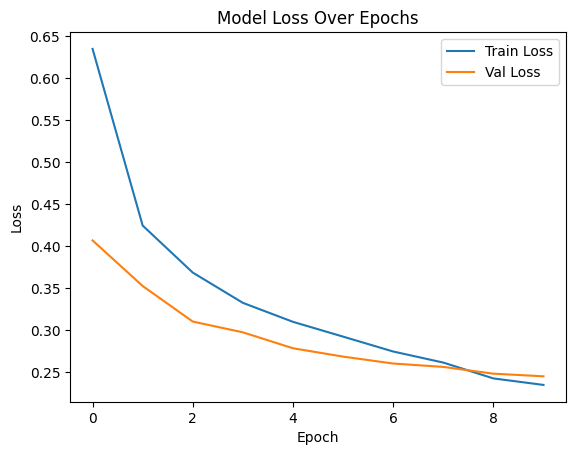

In [15]:
#Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## **Evaluating the Model on Test Data**

In [16]:
#Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9011 - loss: 0.2659
Test Accuracy: 0.9018


## **Confusion Matrix and Classification Report**

In [17]:
#Predict test data classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


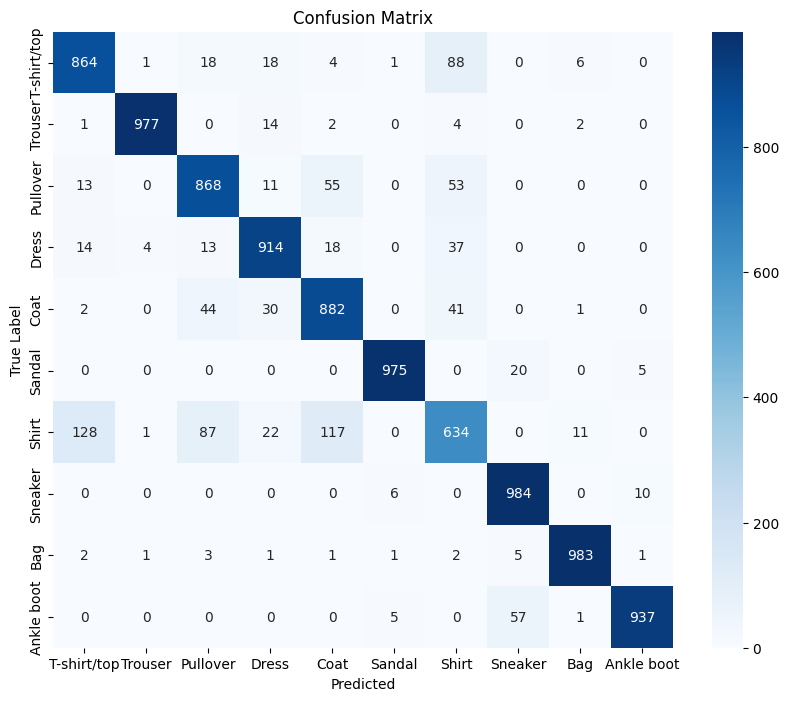

In [18]:
#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [19]:
#Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.63      0.68      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## **Test Sample Predictions**

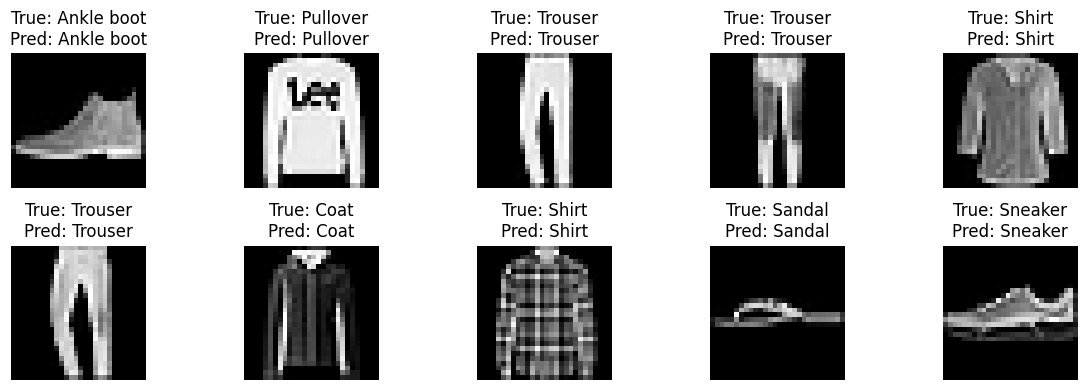

In [20]:
#Show predictions on 10 test samples
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Phase 2: Transition to Real-World Dataset**

* Created a custom dataset in YOLO format
* Classes: ['human', 'vehicle', 'animal']
* Annotated sample images and split into train/val sets

## **Transition to Real CCTV**

In [ ]:
#Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
#Install YOLOv5 dependencies
%pip install -r requirements.txt

# **Phase 3:Training YOLOv5**
* Trained YOLOv5 on the custom dataset
* Fine-tuned hyperparameters (batch size, epochs, image size)
* Stored model weights: yolov5/runs/train/cctv_model/weights/best.pt

In [ ]:
#Start training the YOLOv5 model
!python train.py --img 640 --batch 16 --epochs 30 --data ../dataset_cctv/data.yaml --weights yolov5s.pt --name cctv_model


## **Loading Trained YOLOv5 Model**

In [ ]:
#Load the trained YOLOv5 model
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/cctv_model/weights/best.pt', force_reload=True)

## **Phase 4:Real-Time Detection**

* Used webcam for live video feed
* Loaded trained YOLOv5 model
* Saved frames when objects of interest were detected**

## **Running Object Detection using a WebCam**

In [ ]:
#Run object detection on a CCTV video and trigger recording
import cv2
import torch
from datetime import datetime
from pathlib import Path

# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

# Open webcam (0 = default webcam)
cap = cv2.VideoCapture(0)

# Create directory to save triggered frames
recordings_dir = Path('triggered_frames')
recordings_dir.mkdir(exist_ok=True)

# Define classes of interest
trigger_classes = ['human', 'vehicle', 'animal']

print("Press 'q' to stop...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)
    labels = results.pandas().xyxy[0]['name'].tolist()

    # Check if any trigger class is detected
    if any(obj in trigger_classes for obj in labels):
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"frame_{timestamp}.jpg"
        cv2.imwrite(str(recordings_dir / filename), frame)
        print(f"Triggered: {filename}")

    # Display the frame with bounding boxes
    annotated_frame = results.render()[0]
    cv2.imshow('NIDHI SHARMA WEBCAM DETECTION', annotated_frame)

    # Break on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

# **Results and Observations**

* The Fashion-MNIST model achieved a strong baseline performance.
* YOLOv5 successfully learned to identify target objects in custom CCTV-like data.
* Real-time inference via webcam was effective, with clear detection outputs.
* Triggered frame saving worked correctly based on class detections.



## **Conclusion**
This project demonstrates a feasible solution to automate CCTV recording using deep learning and object classification. By combining Keras-based prototyping and YOLOv5 real-time detection, the system enhances surveillance efficiency and optimizes storage. This pipeline can be scaled for industrial or commercial CCTV setups.

## **Future Scope**
* Expand dataset with real CCTV footage
* Integrate face/person tracking
* Deploy system on edge devices (e.g., Jetson Nano)
* Add sound or alert systems on detection

## **Developed By**
Name: Nidhi Sharma

Role: Student, Guru Jambheshwar University of Science and Technology